In [2]:
from data.processing import DataProcessing, DataSplit
from metrics import show_metrics
import warnings
from sklearn.preprocessing import binarize
from sklearn.linear_model import LogisticRegression


warnings.filterwarnings("ignore")

In [3]:
data_processing = DataProcessing()
data = DataProcessing.get_data("/Users/mkhachatryan/Codes/Econometrics-Project/data_/weatherAUS.csv")

In [4]:

X_train, X_valid, X_test, y_train, y_valid, y_test = DataSplit().split(data)

X_train = data_processing.process(X_train)
X_valid = data_processing.process(X_valid)
X_test = data_processing.process(X_test)

_, X_valid = data_processing.scaler(X_train, X_valid)
X_train, X_test = data_processing.scaler(X_train, X_test)

y_train= data_processing.process_target(y_train )
y_valid = data_processing.process_target(y_valid)
y_test = data_processing.process_target(y_test )


In [5]:
logreg = LogisticRegression(solver='liblinear', random_state=0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [6]:
y_predict_proba_valid = logreg.predict_proba(X_valid)
y_predic_valid = logreg.predict(X_valid)

Recall or Sensitivity : 0.4788
Precision : 0.6981
F-1 Score:  0.5679806918744972
ROC-AUC:  0.7106469870550184
PR-AUC:  nan


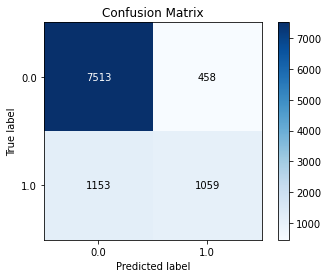

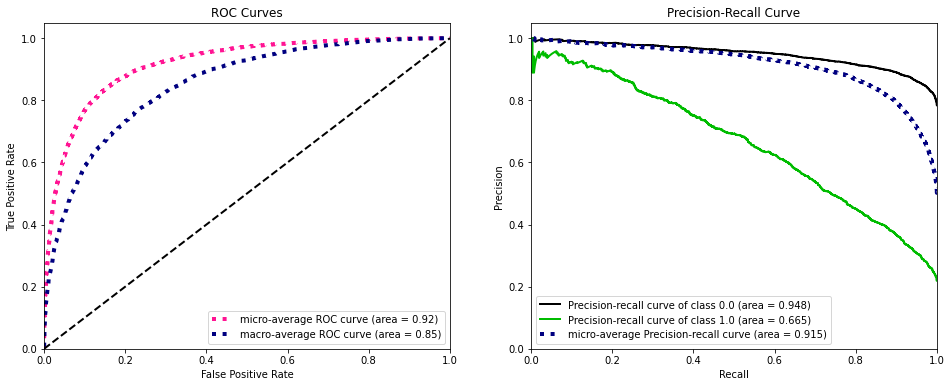

In [7]:
show_metrics(y_valid, y_predic_valid, y_predict_proba_valid)

# Changing Treshold

**************************************************
Results with threshold 1
Recall or Sensitivity : 0.8947
Precision : 0.3743
F-1 Score:  0.5278037071609548
ROC-AUC:  0.7398305351020414
PR-AUC:  nan


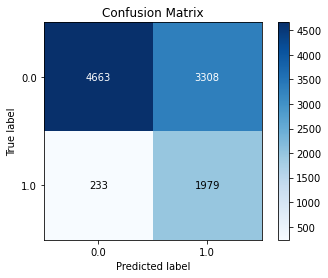

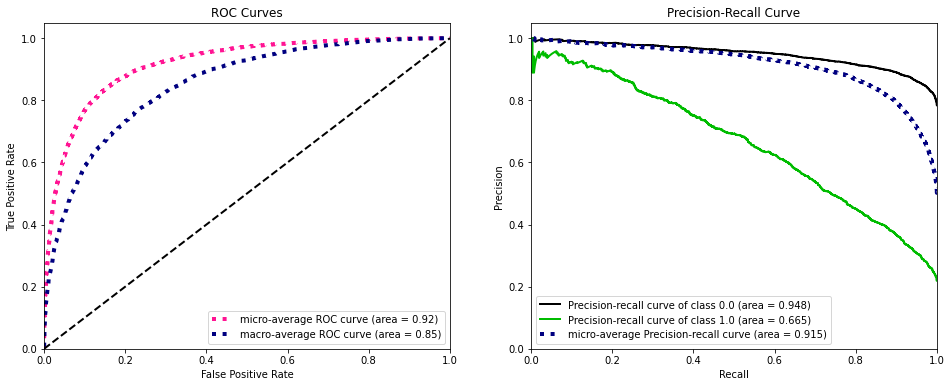

**************************************************
**************************************************
Results with threshold 2
Recall or Sensitivity : 0.7694
Precision : 0.4776
F-1 Score:  0.5893351800554018
ROC-AUC:  0.7679213164901793
PR-AUC:  nan


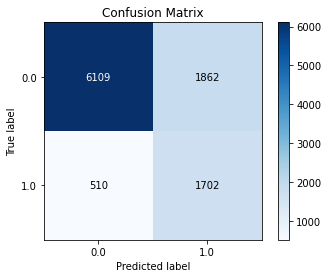

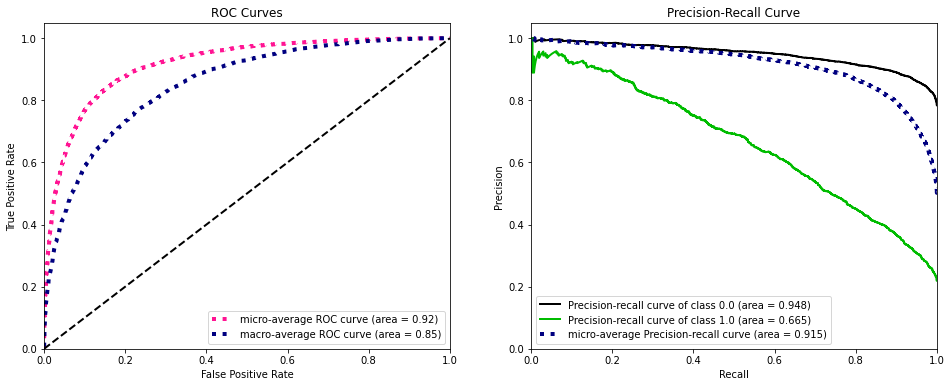

**************************************************
**************************************************
Results with threshold 3
Recall or Sensitivity : 0.6627
Precision : 0.5687
F-1 Score:  0.6121085594989562
ROC-AUC:  0.7616214677845528
PR-AUC:  nan


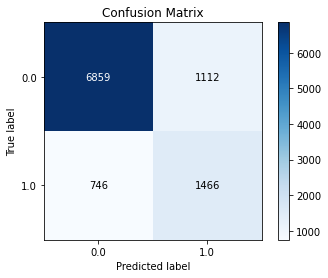

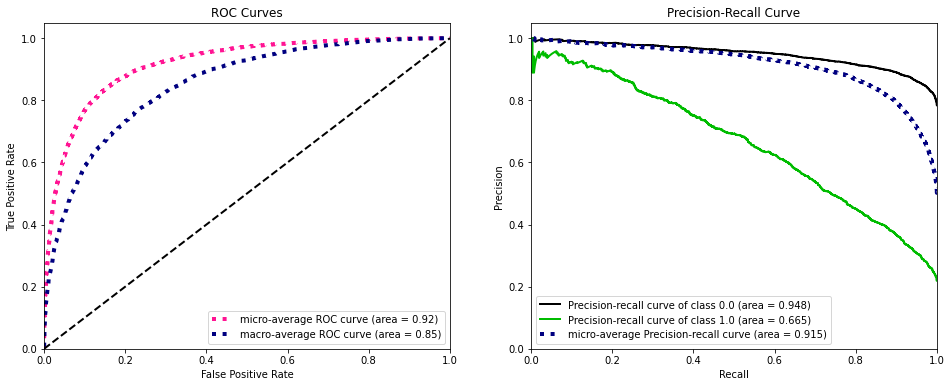

**************************************************
**************************************************
Results with threshold 4
Recall or Sensitivity : 0.5683
Precision : 0.6381
F-1 Score:  0.6011477761836442
ROC-AUC:  0.7394073804612243
PR-AUC:  nan


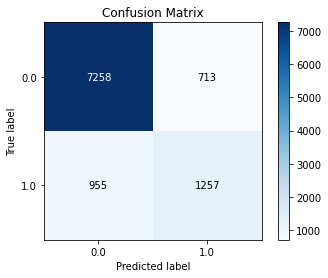

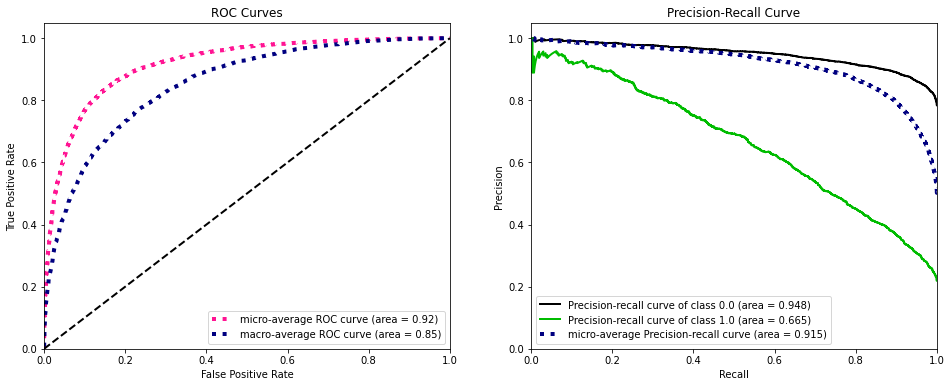

**************************************************


In [9]:

for i in range(1,5):

    cm1=0

    y_pred1 = logreg.predict_proba(X_valid)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, threshold=i/10)


    print ("*"*50)
    print(f"Results with threshold {i}")
    show_metrics(y_valid, y_pred2, logreg.predict_proba(X_valid))
    print ("*"*50)

# Grid Search

In [10]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

In [ ]:
best_model = LogisticRegression(**grid_search.best_params_)

In [ ]:
y_predict_best_proba_valid = best_model.predict_proba(X_valid)
y_predic_best_valid = best_model.predict(X_valid)

In [ ]:
show_metrics(y_valid, y_predic_best_valid, y_predict_proba_valid)

# Thresholds

In [64]:
for i in range(1,5):

    cm1=0

    y_pred1 = best_model.predict_proba(X_valid)[:,1]

    y_pred1 = y_pred1.reshape(-1,1)

    y_pred2 = binarize(y_pred1, i/10)


    print ("*"*50)
    print(f"Results with threshold {i}")
    show_metrics(y_valid, y_pred2, best_model.predict_proba(X_valid))
    print ("*"*50)

NameError: name 'best_model' is not defined

# Final Evaluation on Test set

In [ ]:
y_predict_proba_test = best_model.predict_proba(X_test)
y_predic_best_valid =